In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = pd.read_csv("data/iris.csv")

## Understanding Dataset

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


So there are no null values and all are in the correct data type

In [5]:
iris_df.duplicated().sum()

np.int64(3)

In [6]:
iris_df.drop_duplicates(inplace=True)

In [7]:
for val in iris_df.columns:
    print("Column", val, "has", iris_df[val].nunique(), "values")

Column sepal_length has 35 values
Column sepal_width has 23 values
Column petal_length has 43 values
Column petal_width has 22 values
Column species has 3 values


## EDA

<Axes: xlabel='species', ylabel='count'>

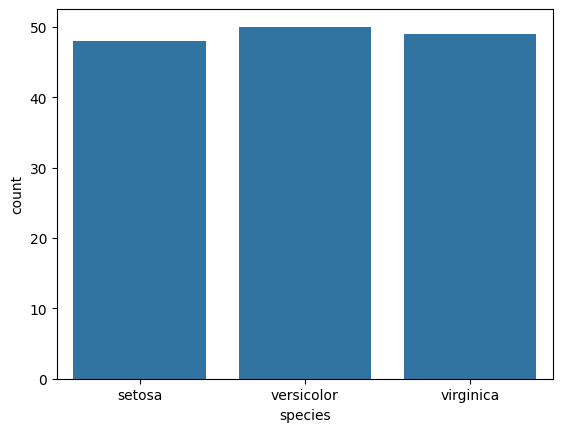

In [8]:
sns.countplot(x='species', data=iris_df)

In [9]:
iris_df['species'].value_counts(normalize=True) * 100

species
versicolor    34.013605
virginica     33.333333
setosa        32.653061
Name: proportion, dtype: float64

In [10]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='species', ylabel='count'>

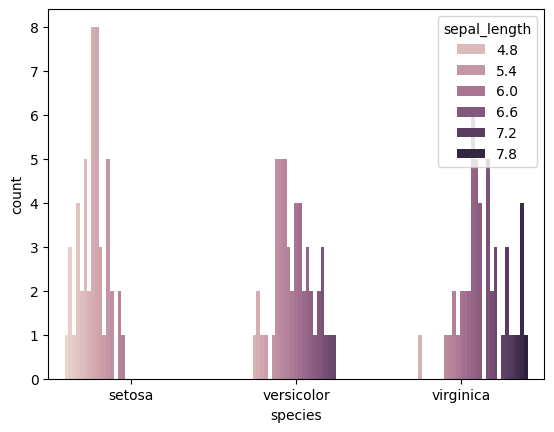

In [11]:
sns.countplot(x='species', hue='sepal_length', data=iris_df)

- most of the setosa are around 5.4 or below
- versicolor is bit evenly distributed have a wide range
- virginica is more tilted to upper bound covering 7.8
- This observation or sepal_length can be a factor to separate these 3 species

<Axes: xlabel='species', ylabel='count'>

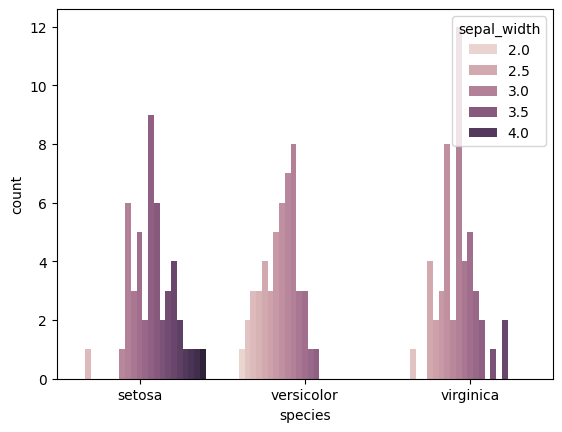

In [12]:
sns.countplot(x='species', hue='sepal_width', data=iris_df)

- Setosa has more sepal_width in compare to other as it leans towards upper bound (3.0-4.0)
- versicolor mostly lean towards the lower range (2.0 - 3.0)
- virginica seems to be the balanced one

<Axes: xlabel='species', ylabel='count'>

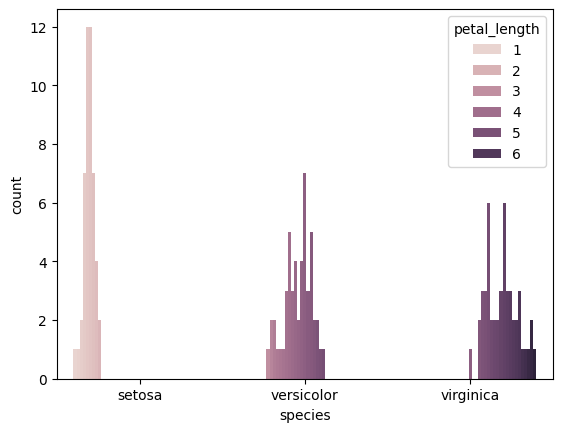

In [13]:
sns.countplot(x='species', hue='petal_length', data=iris_df)

- This gives a insight where all 3 species are seperated from each other very well

<Axes: xlabel='species', ylabel='count'>

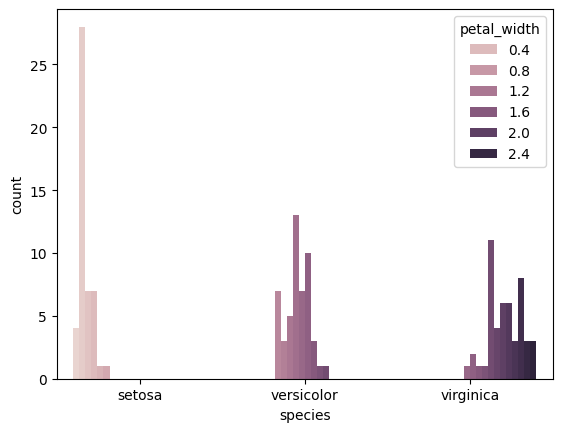

In [14]:
sns.countplot(x='species', hue='petal_width', data=iris_df)

- same goes with petal_width

In [15]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


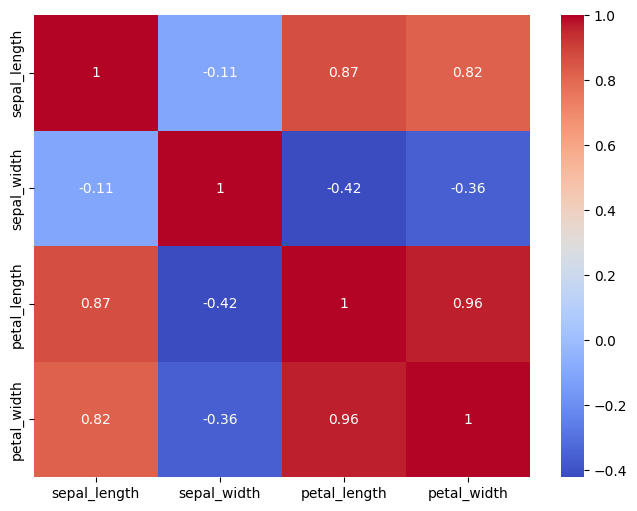

In [16]:
corr_cols = iris_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_cols, annot=True, cmap='coolwarm')
plt.show()

- petal_length & petal_width have corr > .8 with sepal_length which is high
- petal_length & petal_width have corr .96
- so we will remove the petal_length & sepal_length

In [17]:
cols_to_drop = ['petal_length', 'sepal_length']
iris_df.drop(columns=cols_to_drop, inplace=True)

In [18]:
iris_df.head()

,sepal_width,petal_width,species
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa
3,3.1,0.2,setosa
4,3.6,0.2,setosa


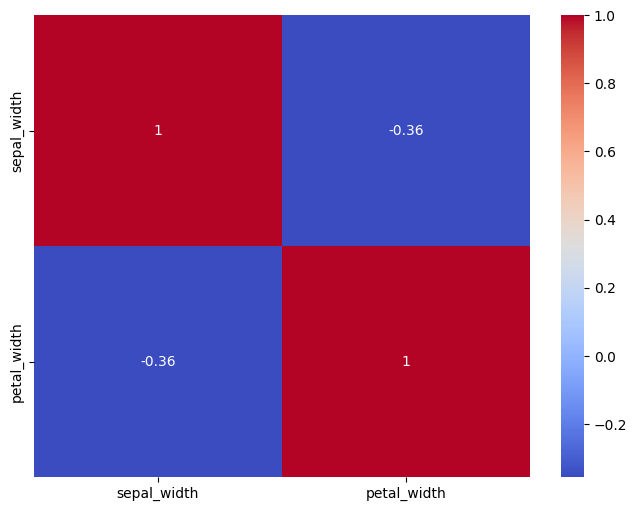

In [19]:
corr_cols = iris_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_cols, annot=True, cmap='coolwarm')
plt.show()

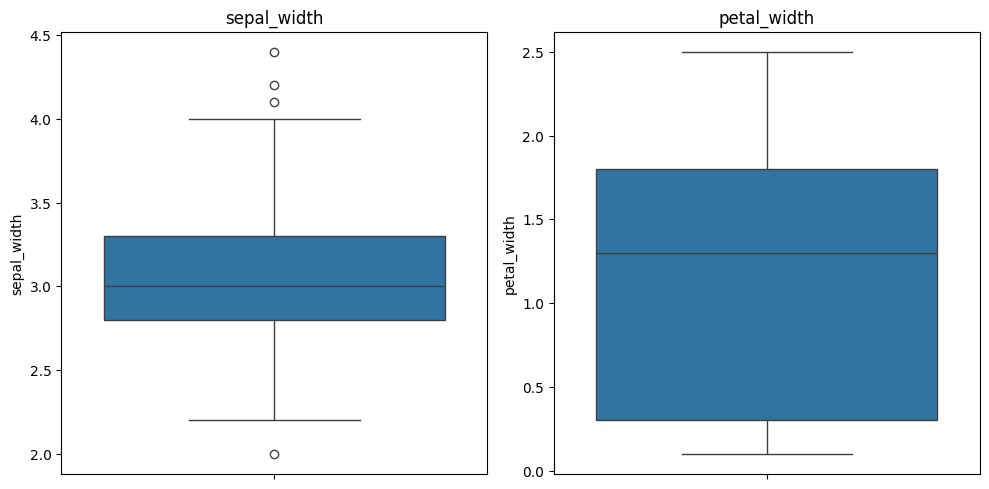

In [20]:
cols = ['sepal_width', 'petal_width']

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes = axes.flatten()

for i, val in enumerate(cols):
    sns.boxplot(iris_df[val], ax=axes[i])
    axes[i].set_title(val)

plt.tight_layout()
plt.show()

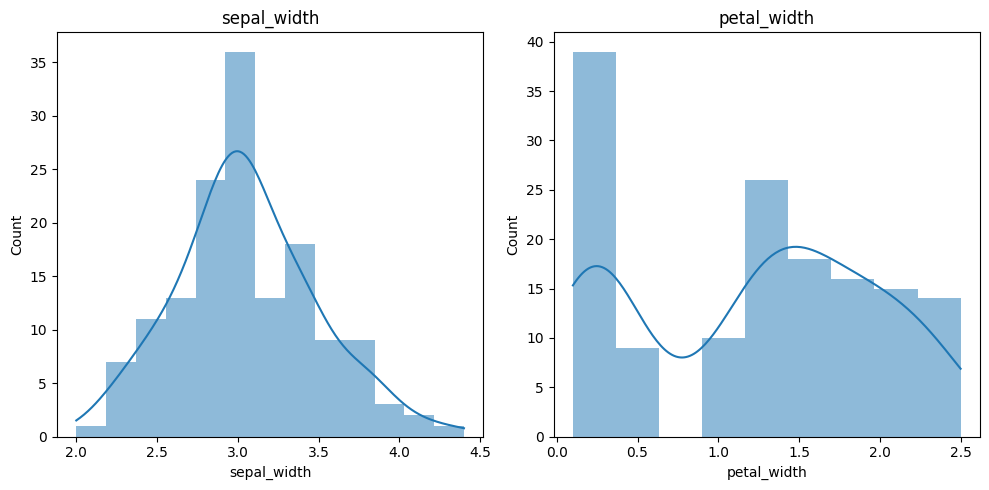

In [21]:
cols = ['sepal_width', 'petal_width']

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes = axes.flatten()

for i, val in enumerate(cols):
    sns.histplot(iris_df[val], ax=axes[i], kde=True, edgecolor= 'None')
    axes[i].set_title(val)

plt.tight_layout()
plt.show()

- From the boxplot and histplot the points seems to be fine and acceptable

In [22]:
iris_df.head()

,sepal_width,petal_width,species
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa
3,3.1,0.2,setosa
4,3.6,0.2,setosa


In [23]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_width  147 non-null    float64
 1   petal_width  147 non-null    float64
 2   species      147 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


In [24]:
iris_df.to_csv("data/cleaned_iris.csv", index= False)